<a href="https://colab.research.google.com/github/martings94/mates-b-sicas/blob/main/Regresi%C3%B3n_lineal_Matem%C3%A1ticas_CdD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regresión lineal**

###Universidad Autónoma del Estado de México
###Matemáticas Básicas para la Ciencia de Datos
###Martin Garduño Santana



###¿Que es la regresión líneal?

La regresión se parece a un detective estadístico que busca pistas sobre cómo se relacionan dos o más variables, toma los valores de unas variables (las independientes) y nos ayuda a predecir el valor de las variables dependientes, esto lo hace mediante una línea recta.

Para que este modelo funcione correctamente, necesitamos cumplir ciertos "requisitos de admisión":
1. Linealidad: Las variables deben relacionarse siguiendo una línea recta.
2. Independencia: Cada observación debe ser autónoma, sin que una afecte a otra, es decir, el resultado de cada observación no afecta a la siguiente.
3. Homocedasticidad: Palabra complicada para algo simple: nos dice que la dispersión de los errores debe ser uniforme. en otras palabras, la variabilidad en los errores debería ser similar.
4. Normalidad: Los errores deben distribuirse siguiendo la "campana de Gauss", con la mayoría agrupados cerca de cero.

Este método tiene varias ventajas que lo vuelven común en implementaciones en la ciencia de datos:
* Simplicidad: fácil de leer y de explicar a otros.
* Interpretabilidad: Cada coeficiente cuenta una historia sobre cuánto influye cada variable en el resultado final.
* Capacidad predictiva: Permite adelantarte a los acontecimientos, estimando resultados futuros basados en datos presentes.

En esencia, la regresión lineal busca establecer una relación clara entre variables mediante una ecuación lineal de la forma:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_k x_k + \epsilon$$

Donde:

*  $y$ es la variable dependiente (la que se quiere predecir).
*  $\beta_0$ es la intersección con el eje y (el valor de $y$ cuando todas las $x$ son 0).
*  $\beta_1, \beta_2, \dots, \beta_k$ son los coeficientes de regresión (indican la influencia de cada variable independiente en la variable dependiente).
*  $x_1, x_2, \dots, x_k$ son las variables independientes (las que se utilizan para predecir $y$).
*  $\epsilon$ es el error aleatorio (la parte de $y$ que no se puede explicar por las variables independientes).


###Uso de la regresión lineal en sector financiero
En el ambito privado como lo es el sector financiero, a pesar de ser simple, se usa por las ventajas. Algunas de las aplicaciones son:

Pronóstico de tendencias económicas: Los bancos analizan indicadores como PIB, inflación y desempleo para predecir condiciones económicas futuras, lo que facilita decisiones informadas sobre tasas de interés y gestión de liquidez.

Puntuación crediticia: La regresión identifica qué factores (historial de pagos, deuda, ingresos)  predicen el comportamiento de pago de una mejor manera y asignan coeficientes que determinan la importancia relativa de cada variable en la calificación final

Gestión de riesgos: Modela la relación entre diferentes clases de activos y factores externos lo que permite cuantificar y anticipar movimientos del mercado para proteger las carteras.

###Caso Práctico Regressión Lineal para estimar tenencia ecónomica


####Objetivo
El objetivo de generar una regresión lineal para identificar tendencias económicas es principalmente cuantificar relaciones entre variables macroeconómicas, poder predecir valores futuros basados en datos históricos e identificar variables influyentes y su impacto específico en la economía para omar decisiones objetivas sustentadas en datos estadísticos.

En este ejercicio se hace la interpretación de la tendencia económica bancaria con datos dummy de las variables macroeconómicas


*   Producto interno Bruto (PIB) - un indicador general de la economía
*   Tasa de inflación - la tasa de aumento de los precios
*   Tasa desempleo - Porcentaje de personas desempleadas
*   Tasa de interes - Costo del dinero (influye en inversiones y préstamos)

Y simulando la tendencia económica de un banco dummy, a partir de dichas variables.

A continuación se muestra el código para la generación de datos simulados y su descripción en gráficas de disperción.


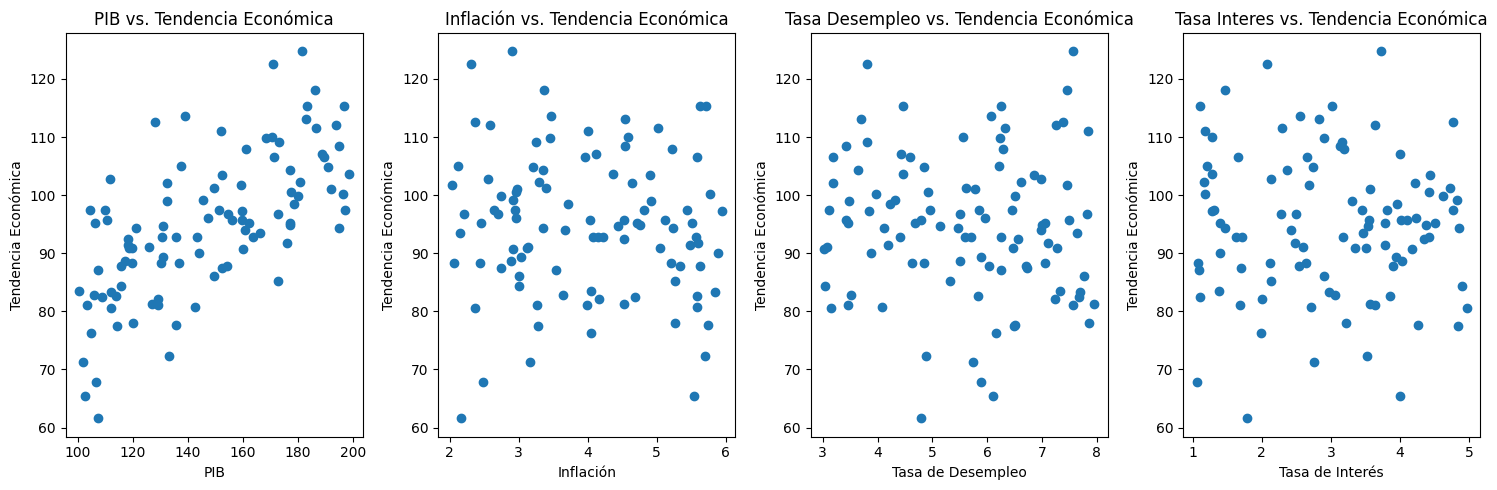

          PIB  Inflacion  Tasa_Desempleo  Tasa_Interes  Tendencia_Economica
0  137.454012   2.125717        6.210158      1.206727           104.952856
1  195.071431   4.545642        3.420700      3.125419           108.392954
2  173.199394   3.257424        3.808144      3.162540           109.177281
3  159.865848   4.034283        7.492771      3.549720            95.758388
4  115.601864   5.630266        6.032145      3.904365            87.875265


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Genera datos aleatorios para simular datos bancarios
np.random.seed(42) #establece una semilla, para generar secuencia de números "aleatorios" y sea la misma cada vez que se ejecute el código. Importante para reproducibilidad de los resultados.
n_samples = 100 #se consideran 100 observaciones, que se consideran como los valores de 100 meses pasados de las macrovariables

# Crea Variables independientes
pib = np.random.uniform(100, 200, n_samples)  # Producto Interno Bruto con una distribución uniforme entre 100 y 200 pesos
inflacion = np.random.uniform(2, 6, n_samples) # Tasa de inflación con una distribución uniforme entre 2 y 6%
tasa_desempleo = np.random.uniform(3, 8, n_samples)  # Tasa de desempleo con una distribución uniforme entre 3 y 8%
tasa_interes = np.random.uniform(1,5, n_samples) # Tasa de interés con una distribución uniforme entre 1 y 5%
# Crea variable dependiente (simulación de la tendencia económica del banco) por identificar si es buena o no.
tendencia = 50 + 0.3 * pib - 0.5 * inflacion + 0.2 * tasa_desempleo + 0.4 * tasa_interes + np.random.normal(0, 10, n_samples)

# Crea DataFrame de pandas para manejar las variables dependientes e independientes
data = {
    'PIB': pib,
    'Inflacion': inflacion,
    'Tasa_Desempleo': tasa_desempleo,
    'Tasa_Interes': tasa_interes,
    'Tendencia_Economica': tendencia
}

df = pd.DataFrame(data)

# Genera gráficas de dispersión en una sola vista
plt.figure(figsize=(15, 5))

#Grafico de dispersión de variables Tendencia vs PIB
plt.subplot(1, 4, 1)
plt.scatter(df['PIB'], df['Tendencia_Economica'])
plt.xlabel('PIB')
plt.ylabel('Tendencia Económica')
plt.title('PIB vs. Tendencia Económica')

#Grafico de dispersión de variables Tendencia vs Tasa de Inflación
plt.subplot(1, 4, 2)
plt.scatter(df['Inflacion'], df['Tendencia_Economica'])
plt.xlabel('Inflación')
plt.ylabel('Tendencia Económica')
plt.title('Inflación vs. Tendencia Económica')

#Grafico de dispersión de variables Tendencia vs Tasa de Desempleo
plt.subplot(1, 4, 3)
plt.scatter(df['Tasa_Desempleo'], df['Tendencia_Economica'])
plt.xlabel('Tasa de Desempleo')
plt.ylabel('Tendencia Económica')
plt.title('Tasa Desempleo vs. Tendencia Económica')

#Grafico de dispersión de variables Tendencia vs Tasa de interés
plt.subplot(1,4,4)
plt.scatter(df['Tasa_Interes'], df['Tendencia_Economica'])
plt.xlabel('Tasa de Interés')
plt.ylabel('Tendencia Económica')
plt.title('Tasa Interes vs. Tendencia Económica')


plt.tight_layout()
plt.show()

print(df.head()) # muestra primeros 5 registros


In [5]:
## Creación del modelo de regresión lineal.

#importar la libreria de estadística
import statsmodels.api as sm

# Define las variables independientes (X) con las macrovariables y la variable dependiente (y) con la tendencia
X = df[['PIB', 'Inflacion', 'Tasa_Desempleo', 'Tasa_Interes']]
y = df['Tendencia_Economica']

# Agrega una constante a las variables independientes (intercepto)
X = sm.add_constant(X)

# Crea el modelo de regresión lineal desde libreria Statsmodel
modelo = sm.OLS(y, X)

# Ajusta el modelo a los datos
resultados = modelo.fit()

# Imprime los resultados del modelo
print(resultados.summary())


                             OLS Regression Results                            
Dep. Variable:     Tendencia_Economica   R-squared:                       0.457
Model:                             OLS   Adj. R-squared:                  0.435
Method:                  Least Squares   F-statistic:                     20.03
Date:                 Mon, 21 Apr 2025   Prob (F-statistic):           5.51e-12
Time:                         23:40:11   Log-Likelihood:                -361.49
No. Observations:                  100   AIC:                             733.0
Df Residuals:                       95   BIC:                             746.0
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             54.6731      8.4

####Interpretación de los resultados:

Se realiza a continuación una breve descripción de los resultados del modelo y posteriormente el analisis gráfico para complementar.

1. Medidas de ajuste del modelo

R-squared (0.457): Indica que el modelo explica el 45.7% de la variabilidad en la Tendencia Económica. Es un valor moderado, lo que sugiere que hay otros factores no incluidos en el modelo que también influyen.

Adjusted R-squared (0.435): Similar al R-squared, pero ajustado por el número de variables. Es útil para comparar modelos con diferente número de predictores. No se usa en este caso.

F-statistic (20.03) y Prob (F-statistic) (5.51e-12): Evalúan si el modelo en conjunto es significativo. Como el valor de probabilidad es muy bajo (menor a 0.05), se concluye que al menos una variable del modelo explica significativamente la Tendencia Económica (siendo el PIB, como se explica más adelante).

2. Coeficientes del modelo

Cada fila representa una variable y cómo influye en la Tendencia Económica:

const (54.67): Es la constante del modelo. Representa el valor estimado de la Tendencia Económica cuando todas las variables son cero.

PIB (0.2812): Este coeficiente es positivo y altamente significativo (p < 0.001), lo que sugiere que un aumento en el PIB se asocia con un aumento en la Tendencia Económica. Es la variable más influyente del modelo.

Inflación (-0.7145): El coeficiente es negativo, lo que implicaría que a mayor inflación, menor tendencia económica. Sin embargo, no es estadísticamente significativo (p = 0.375), por lo que no se puede afirmar con certeza este efecto.

Tasa de Desempleo (-0.2126): También tiene un efecto negativo, pero tampoco es significativo (p = 0.747), por lo que su influencia en la Tendencia Económica no es clara según este modelo.

Tasa de Interés (0.9535): Tiene un coeficiente positivo, lo que sugiere una posible relación directa con la Tendencia Económica, pero el resultado no es estadísticamente significativo (p = 0.254).

3. Diagnósticos del modelo

Durbin-Watson (1.962): Esta estadística verifica si los residuos (errores) están autocorrelacionados. Un valor cercano a 2 indica que no hay autocorrelación, lo cual es bueno.Y nos explica el supuesto 2 de independencia.

Omnibus / Jarque-Bera / Skew / Kurtosis: Son pruebas para verificar si los residuos del modelo siguen una distribución normal. En este caso, los valores sugieren que los residuos son aproximadamente normales, lo cual es una buena señal para la validez del modelo y nos explica el supuesto 4, Normalidad.

Cond. No. (1.38e+03): Mide posibles problemas de multicolinealidad (cuando las variables están correlacionadas entre sí). Un valor alto podría ser preocupante, aunque este valor no es extremo, sí merece atención si se desea afinar el modelo.

#### Supuesto 1: Linealidad
La relación entre las variables independientes y la variable dependiente debe ser lineal.

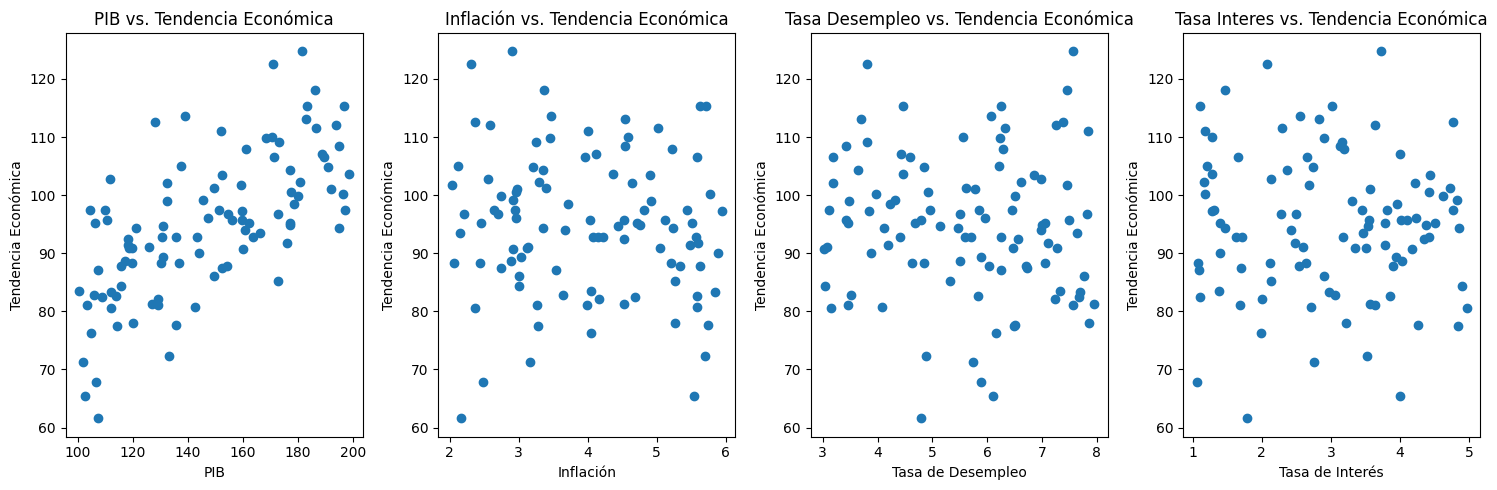

In [6]:
#Generación de gráficos para visualización de resultados y evaluación de los supuestos:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

#Grafico de dispersión de variables Tendencia vs PIB
plt.subplot(1, 4, 1)
plt.scatter(df['PIB'], df['Tendencia_Economica'])
plt.xlabel('PIB')
plt.ylabel('Tendencia Económica')
plt.title('PIB vs. Tendencia Económica')

#Grafico de dispersión de variables Tendencia vs Tasa de Inflación
plt.subplot(1, 4, 2)
plt.scatter(df['Inflacion'], df['Tendencia_Economica'])
plt.xlabel('Inflación')
plt.ylabel('Tendencia Económica')
plt.title('Inflación vs. Tendencia Económica')

#Grafico de dispersión de variables Tendencia vs Tasa de Desempleo
plt.subplot(1, 4, 3)
plt.scatter(df['Tasa_Desempleo'], df['Tendencia_Economica'])
plt.xlabel('Tasa de Desempleo')
plt.ylabel('Tendencia Económica')
plt.title('Tasa Desempleo vs. Tendencia Económica')

#Grafico de dispersión de variables Tendencia vs Tasa de interés
plt.subplot(1,4,4)
plt.scatter(df['Tasa_Interes'], df['Tendencia_Economica'])
plt.xlabel('Tasa de Interés')
plt.ylabel('Tendencia Económica')
plt.title('Tasa Interes vs. Tendencia Económica')


plt.tight_layout()
plt.show()


#### Supuesto 2: Independencia de los errores
Los errores deben ser independientes entre sí.  No existe correlación entre errores sucesivos. Se busca que los puntos estén aleatoriamente dispersos alrededor de cero, sin patrones claros.

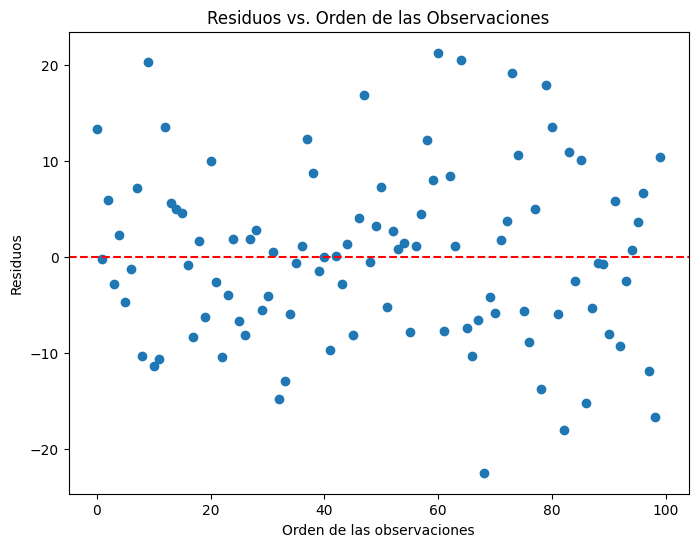

In [7]:
# Gráfico: Gráfico de residuos vs. orden de las observaciones.
plt.figure(figsize=(8, 6))
plt.plot(resultados.resid, marker='o', linestyle='None')
plt.xlabel('Orden de las observaciones')
plt.ylabel('Residuos')
plt.title('Residuos vs. Orden de las Observaciones')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


#### Supuesto 3: Homocedasticidad
La varianza de los errores debe ser constante a lo largo de los valores predichos. Se busca que la dispersión de los puntos sea similar para todos los valores ajustados, sin patrones de forma de embudo o megáfono.

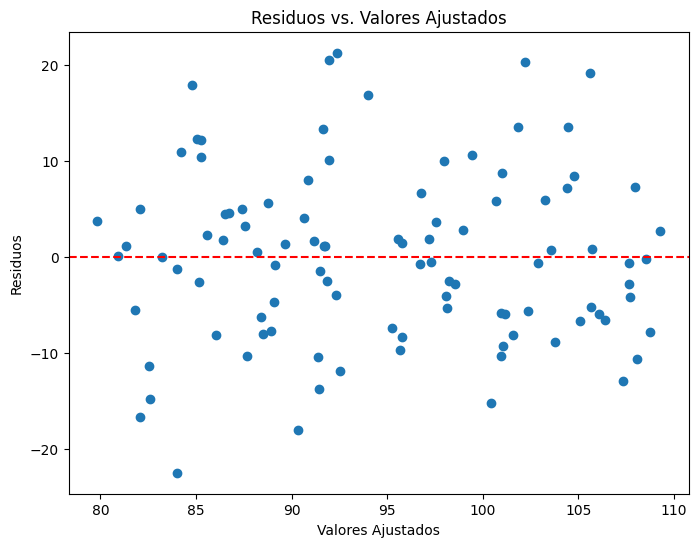

In [8]:
# Gráfico: Gráfico de residuos vs. valores ajustados.
plt.figure(figsize=(8, 6))
plt.scatter(resultados.fittedvalues, resultados.resid)
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores Ajustados')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


#### Supuesto 4: Normalidad de los errores
Los errores deben seguir una distribución normal. En el histograma, se busca que la distribución de los residuos se parezca a una campana de Gauss.  En el gráfico Q-Q, los puntos deben estar cerca de la línea diagonal,






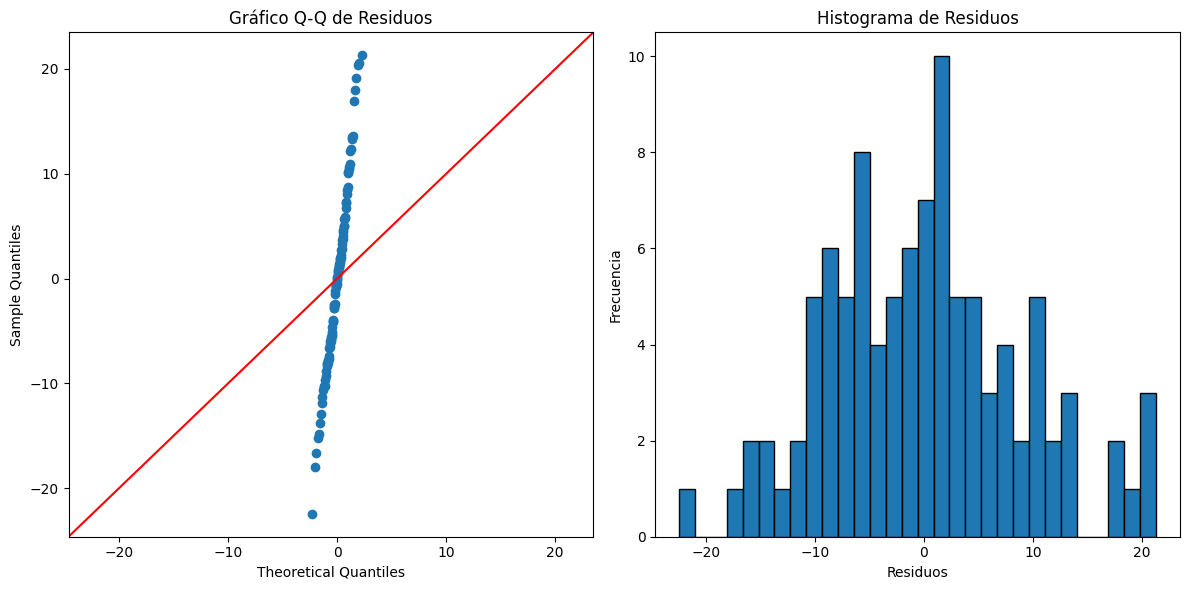

In [12]:
# Gráficos: Histograma de residuos y gráfico Q-Q de residuos.

# Optimización 1: Usar una sola figura y ejes con subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico Q-Q
sm.qqplot(resultados.resid, line='45', ax=ax1)
ax1.set_title('Gráfico Q-Q de Residuos')

# Histograma
ax2.hist(resultados.resid, bins=30, edgecolor='k')
ax2.set_xlabel('Residuos')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Histograma de Residuos')

plt.tight_layout()
plt.show()




## Descripción de Consideraciones para Mejorar el Modelo y Próximos Pasos

Las principales debilidades (R-cuadrado bajo, variables no significativas, datos simulados y posible multicolinealidad) están bien identificadas y explicadas.
Las mejoras propuestas son técnicamente sólidas:



*   Usar datos reales mejorará la validez
*   La ingeniería de características podría descubrir relaciones complejas
*   La validación cruzada y análisis de residuales asegurarán robustez
*   Considerar modelos alternativos es prudente si persisten problemas

Se recomendaria priorizar la obtención de datos reales y la eliminación de variables no significativas como primeros pasos, seguido de un análisis de multicolinealidad más riguroso y posibles transformaciones de variables.